In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [117]:
test_file = open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r')
manual_file = open("/content/gdrive/MyDrive/projectfolder/manual_keywords_rb.txt",'r')
data1=test_file.read()

In [106]:
file1 = open('/content/gdrive/MyDrive/projectfolder/largetext.txt','r')
file2 = open('/content/gdrive/MyDrive/projectfolder/CharlotteMar2_2020.txt','r')


manual_file1 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords2.txt",'r')
manual_file2 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords3.txt",'r')


In [107]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize 
import math
import operator
from rake_nltk import Rake
from nltk import tokenize
from matplotlib import pyplot as plt  
import random
import time
r = Rake()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
def main(file,manual_file):
  doc1 = file.read()
  data_manual = manual_file.read()
  manual_phrases = data_manual.split("\n")
  manual_content_words = []
  for i in manual_phrases:
    w = i.split(" ")
    for j in w:
      if j not in manual_content_words:
        manual_content_words.append(j)
  doc=""
  for i in doc1:
    if i.isalpha():
      i=i.lower()
      doc+=i
    else:
      doc+=i

  rake_content_words = []
  def rake_algorithm(data):
    r = Rake()
    r.extract_keywords_from_text(data)
    y=r.get_ranked_phrases()
    t=r.get_ranked_phrases_with_scores()
    for i in y:
      w = i.split(" ")
      for j in w:
        if j not in rake_content_words:
          rake_content_words.append(j)
  rake_algorithm(doc)
  bow_content_words=[]
  def bow(data):
    def unique(sequence):
        seen = set()
        return [x for x in sequence if not (x in seen or seen.add(x))]
    #create a list of stopwords.You can import stopwords from nltk too
    stopwords=stop_words
    #list of special characters.You can use regular expressions too
    special_char=[",",":"," ",";",".","?"]
    #Write the sentences in the corpus,in our case, just two 
    strings = sent_tokenize(data)
    tokens=[]
    for i in strings:
      string = i.lower()
      token = string.split()
      tokens.append(token)
    #create a vocabulary list
    tok=[]
    for i in tokens:
      tok+=i
    vocab=unique(tok)
    #filter the vocabulary list
    for w in vocab: 
        if w not in stopwords and w not in special_char: 
            bow_content_words.append(w)
  bow(doc)
  similar_words_rake = []
  similar_words_bow=[]

  for i in bow_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_bow:
          similar_words_bow.append(i)
  for i in rake_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_rake:
          similar_words_rake.append(i)
  rake_similar = (len(similar_words_rake)/len(manual_content_words))*100
  bow_similar = (len(similar_words_bow)/len(manual_content_words))*100
  return [bow_similar,rake_similar]


In [111]:
res = main(test_file,manual_file)
print("BOW accuracy:")
print(res[0])
print("RAKE accuracy:")
print(res[1])

BOW accuracy:
68.71165644171779
RAKE accuracy:
75.4601226993865


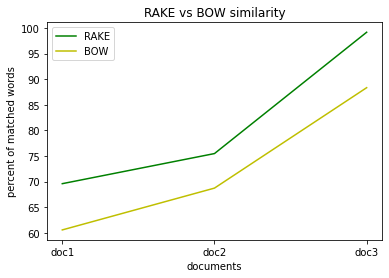

In [112]:

res1 = main(file2,manual_file2)
res3 = main(file1,manual_file1)
import numpy as np
import matplotlib.pyplot as plt
x=["doc1","doc2","doc3"]
y1 = [res1[0],res[0],res3[0]]
y2 = [res1[1],res[1],res3[1]]
plt.plot(x, y2,label="RAKE", color='g')
plt.plot(x, y1,label="BOW", color='y')
plt.xlabel("documents")
plt.ylabel("percent of matched words")
plt.title('RAKE vs BOW similarity') 
plt.legend(loc='upper left')
plt.show();

In [119]:

def main_c(txt):
        stop_words=set(stopwords.words('english'))
        sentences = txt.split(".")
        noOfSentences= int(len(sentences)*(1/4))
        #print(sentences)

        #user wants to reduce the content to "no_sentences" lines.                    
        def summarize(text,no_sentences):
                word_weights={}
                for word in word_tokenize(text):
                        word=word.lower()
                        if len(word) >1 and word not in stop_words:
                            if word in word_weights.keys():
                                word_weights[word]+=1
                            else:
                                word_weights[word]=1
                sentence_weights={}
                for sent in tokenize.sent_tokenize(text):
                        sentence_weights[sent]=0
                        for word in word_tokenize(sent):
                            word=word.lower()
                            if word in word_weights.keys():
                                sentence_weights[sent]+=word_weights[word]
                highest_weights = sorted(sentence_weights.values())[-no_sentences:] # draw the graphs for the highest words and highest weighted sentences
                summary=""
                for sentence,strength in sentence_weights.items():
                        if strength in highest_weights:
                            summary+=sentence+" "
                summary = summary.replace("_"," ").strip()
                return summary

        all_reducetext1=summarize(txt,noOfSentences)
        sentences=all_reducetext1.split(".")
        return sentences

R = main_c(data1)

In [121]:
from graphviz import Digraph
g = Digraph('unix', filename='concept-map3',node_attr={'color': 'lightblue2', 'style': 'filled','shape': 'box'})

for i in range(len(R)-1):
  if len(R[i+1])>1:
    g.edge(R[i],R[i+1])
g.view()

'concept-map3.pdf'

In [122]:
from google.colab import files
files.download('concept-map3.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>